# Exercises

## Objective

The first 3 laboratory hours introduce basic implementations of Genetic Algorithms, Evolutionary Strategies and NSGA-II. Each is written in Python and is intended to give you a quick understanding of how the theory introduced during lectures can be used to solve simple optimisation problems. Future exercise sheets will use the RoboGen software (https://robogen.org/) which will be used as a black box where you are only expected to work with the GUI (although you can look at the C++ code if you wish https://github.com/lis-epfl/robogen). For this reason, you should spend time reading the Python code in this exercise sheet and compare it with the theory before the implementation is hidden under a layer of abstraction.

As the functions we will optimise parameters for are simple and the algorithms are not computationally expensive, you should also use this opportunity to observe the effects of changing algorithm parameters such as the mutation rate, crossover rate, selection pressure, population size and number of generations. The future RoboGen problems will be more complex and so it will be significantly more time consuming and computationally expensive to gain an appreciable understanding of how each parameter influences the progression and result of the optimisation procedure.

In the exercises you will solve the following three problems using evolutionary algorithms.

In [1]:
pip install swig

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install gymnasium[box2d]

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Problem 1: Reversed Ackley-Function

As long as you have no local maxima, finding the global maximum is no problem! But what to do, if you have plenty of local maxima?

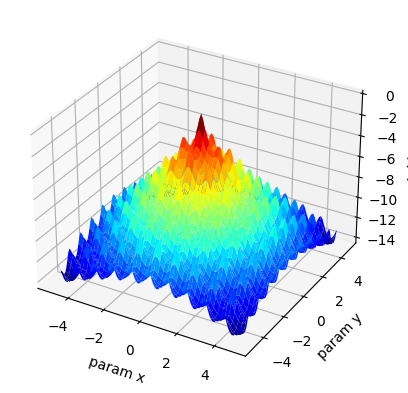

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Reversed Ackley function
def ackley(x, y):
    return -1 * (
        -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2)))
        - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y)))
        + np.e
        + 20
    )


# define range for input
r_min, r_max = -5.0, 5.0
# sample input range uniformly at 0.1 increments
xaxis = np.arange(r_min, r_max, 0.1)
yaxis = np.arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = np.meshgrid(xaxis, yaxis)
# compute targets
results = ackley(x, y)
# create a surface plot with the jet color scheme
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
surf = ax.plot_surface(x, y, results, cmap="jet")
ax.set_xlabel("param x")
ax.set_ylabel("param y")
ax.set_zlabel("Ackley")
plt.show()

## Problem 2: Mountain Car
Documentation: https://gymnasium.farama.org/environments/classic_control/mountain_car_continuous/

> Picture yourself cruising through the picturesque Vevey valley in Switzerland, behind the wheel of your classic old-timer car. As you soak in the serene beauty, a formidable mountain looms ahead. You're well aware that your vintage car, charming as it is, lacks the horsepower necessary for such a steep climb. Yet, as an ingenious student from EPFL, a spark of innovation lights up in your mind. You realize that by maneuvering your car in a strategic pattern of reversing and advancing, you could build up enough momentum to conquer the mountain's peak. It's not just a drive, but a clever dance with physics, guiding you towards the continuation of your scenic journey.

But do you think also an evolutionary algorithm can find this strategy? Let's find out!

In [8]:
import gymnasium as gym
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from io import BytesIO
from ipywidgets import widgets

# Create the environment
env = gym.make("MountainCarContinuous-v0", render_mode="rgb_array")
env.reset()

# Create a widget for displaying the environment
image_widget = widgets.Image(format="jpeg")

# Display the widget
display(image_widget)


def update_image(env):
    img = env.render()
    img = Image.fromarray(img)
    with BytesIO() as output:
        img.save(output, format="JPEG")
        image_data = output.getvalue()
        image_widget.value = image_data


# Run and update environment
for _ in range(1000):
    action = env.action_space.sample()  # Replace with your action policy
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()

    update_image(env)
    clear_output(wait=True)

env.close()

Image(value=b'', format='jpeg')

error: XDG_RUNTIME_DIR not set in the environment.


## Problem 3: Bipedal Walker

Reference: https://gymnasium.farama.org/environments/box2d/bipedal_walker/

As you prepare to review the last lecture on Evolutionary Robotics, you find yourself inadvertently veering off course, landing on YouTube watching some cool robotics videos like [Atlas](https://www.youtube.com/watch?v=vjSohj-Iclc) from Boston Dynamics. Suddenly, your inner engineer starts talking to you: 'Bipedal locomotion - that looks challenging. Could I use one of the algorithms I'm learning about to solve this?'

In [9]:
import gymnasium as gym
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from io import BytesIO
from ipywidgets import widgets

# Create the environment
env = gym.make("BipedalWalker-v3", render_mode="rgb_array")
env.reset()

# Create a widget for displaying the environment
image_widget = widgets.Image(format="jpeg")

# Display the widget
display(image_widget)


def update_image(env):
    img = env.render()
    img = Image.fromarray(img)
    with BytesIO() as output:
        img.save(output, format="JPEG")
        image_data = output.getvalue()
        image_widget.value = image_data


# Run and update environment
for _ in range(400):
    action = env.action_space.sample()  # Replace with your action policy
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()

    update_image(env)
    clear_output(wait=True)

env.close()

Image(value=b'', format='jpeg')

## Problem 4: Beam